In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
logo= pd.read_csv(r"C:\Users\Sirisha\Downloads\hearing_test.csv")
logo

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [4]:
logo['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [5]:
logo.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
logo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
logo.nunique()

age                69
physical_score    404
test_result         2
dtype: int64

In [8]:
logo['age'].nsmallest()

594     18.0
1187    21.0
3196    21.0
454     22.0
2215    22.0
Name: age, dtype: float64

In [9]:
logo['age'].nlargest()

3881    90.0
4131    87.0
4928    86.0
4683    85.0
1583    84.0
Name: age, dtype: float64

<AxesSubplot:xlabel='test_result', ylabel='count'>

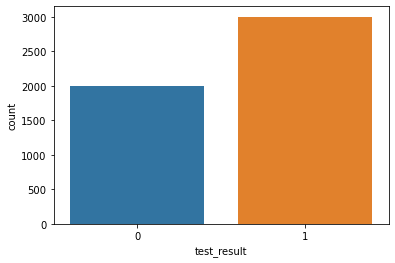

In [10]:
sns.countplot(x=logo['test_result'])

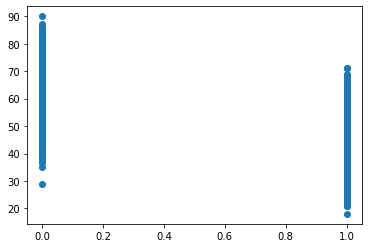

In [11]:
plt.scatter(x=logo['test_result'],y=logo['age'])
plt.show()

<AxesSubplot:xlabel='age', ylabel='physical_score'>

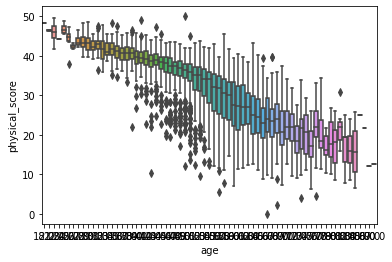

In [12]:
sns.boxplot(x=logo['age'], y=logo['physical_score'])

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

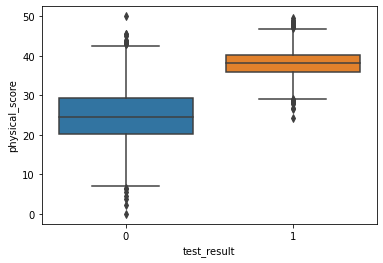

In [13]:
sns.boxplot(x=logo['test_result'], y=logo['physical_score'])

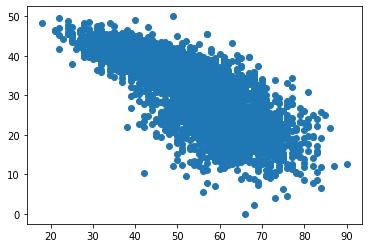

In [14]:
plt.scatter(x=logo['age'],y=logo['physical_score'], cmap='YlGnBu')
plt.show()

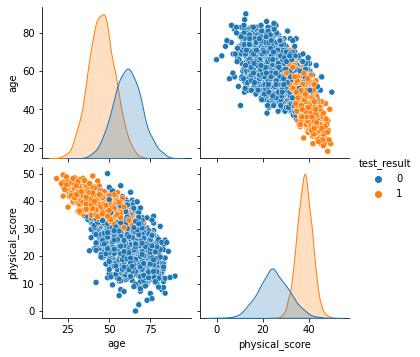

In [15]:
sns.pairplot(logo, hue='test_result')

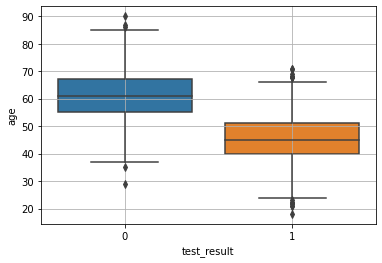

In [16]:
sns.boxplot(x=logo['test_result'], y=logo['age'])
plt.grid()

<AxesSubplot:>

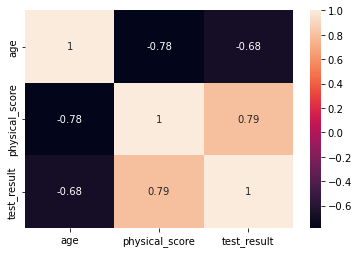

In [17]:
sns.heatmap(logo.corr(),annot=True)

In [18]:
x= logo.drop('test_result',axis=1)
y= logo['test_result']

In [19]:
logo

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [20]:
x

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [21]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_x_train= scaler.fit_transform(x_train)
scaler_x_test= scaler.transform(x_test)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 2), (1500, 2), (3500,), (1500,))

In [25]:
y_train

2654    0
2468    0
290     0
1463    1
4508    1
       ..
4171    0
599     1
1361    0
1547    0
4959    1
Name: test_result, Length: 3500, dtype: int64

------------------------------------------------------------------------------------------------------

In [26]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(scaler_x_train,y_train)

LogisticRegression()

In [27]:
model.predict(scaler_x_train)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
model.score(scaler_x_train,y_train)

0.9137142857142857

In [29]:
model.score(scaler_x_test,y_test)

0.9206666666666666

In [30]:
y_pred = model.predict(scaler_x_test)

In [31]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.9206666666666666

In [34]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
3412    0
4020    0
4635    0
1700    1
790     1
Name: test_result, Length: 1500, dtype: int64

In [35]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9206666666666666

In [37]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
3412    0
4020    0
4635    0
1700    1
790     1
Name: test_result, Length: 1500, dtype: int64

In [38]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[515,  82],
       [ 37, 866]], dtype=int64)

In [40]:
y_pred = y_pred.reshape(y_pred.shape[:])

In [41]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [42]:
scaler_x_test

array([[-1.13324369,  0.62226257],
       [-0.59965361,  0.73269662],
       [ 0.37859486, -1.34100944],
       ...,
       [ 2.15722846, -1.63550024],
       [-0.15499521,  0.38912402],
       [-0.06606353,  0.49955807]])

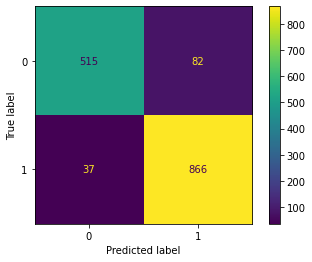

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,scaler_x_test,y_test)

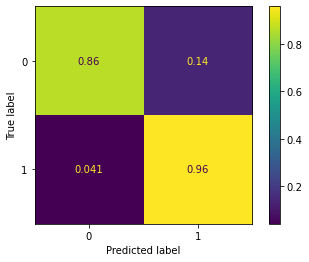

In [44]:
plot_confusion_matrix(model,scaler_x_test,y_test,normalize='true')

In [45]:
import joblib

In [47]:
joblib.dump(scaler,"scaler_joblib")

['scaler_joblib']

In [48]:
joblib.dump(model,"model.pkl")

['model.pkl']

In [49]:
check = logo.copy()

In [50]:
check = check.head(1)
check

,age,physical_score,test_result
0,33.0,40.7,1


In [53]:
check.drop(['test_result'],1,inplace=True)

In [54]:
check

,age,physical_score
0,33.0,40.7


In [55]:
scale = joblib.load('model.pkl')

In [56]:
scale.predict(check)

array([1], dtype=int64)